In [111]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [112]:
path = 'C:/Users/weijia/OneDrive - University Of Cambridge/BuildingPhysics/'
BE_data = pd.read_csv(path +'BE.csv')
BE_lookup = pd.read_csv(path + 'BE_Lookup.csv')

In [113]:
BE_data.head()

,Timestamp,TT_1 (degC),TT_2 (degC),TT_3 (degC),TT_4 (degC),TT_5 (degC),TT_6 (degC),TT_7 (degC),TT_8 (degC),TT_9 (degC),TT_10 (degC),TT_11 (degC),TT_12 (degC),HFM1 (W/m2),HFM2 (W/m2),PYR1 (W/m2),PYR2 (W/m2)
0,2015-11-17 11:38,17.968916,21.659502,17.656664,16.854578,17.042112,21.883074,13.614186,18.164094,18.152962,14.375336,14.221566,13.284032,29.984530,19.152234,32.758632,23.685198
1,2015-11-17 11:40,17.915388,21.553094,17.691922,18.059144,17.050532,23.149662,13.734468,18.163776,18.174248,14.437080,14.300856,12.782228,29.282246,19.960770,34.220116,25.746712
2,2015-11-17 11:42,17.920400,21.421262,17.696986,15.954866,16.953612,21.634510,13.641152,18.119716,18.131226,14.455600,14.296944,12.684214,25.987986,19.002638,29.582350,22.362934
3,2015-11-17 11:44,17.959024,21.517566,17.731504,17.179632,17.050048,22.427834,13.774438,18.256426,18.256516,14.499040,14.353696,13.095048,33.584948,20.054118,30.762368,22.485106
4,2015-11-17 11:46,17.960822,21.523854,17.742314,16.661556,17.011852,21.840942,14.116296,18.302652,18.297462,14.505342,14.351028,12.917860,29.284888,20.768228,24.327064,18.803796


In [114]:
BE_lookup

,TT_Name,TT_Location
0,TT_1 (degC),Inside wall surface
1,TT_2 (degC),Inside wall environment
2,TT_3 (degC),Inside wall surface
3,TT_4 (degC),Outside window surface
4,TT_5 (degC),Outside window surface
5,TT_6 (degC),Inside window environment
6,TT_7 (degC),Outside window environment
7,TT_8 (degC),Inside window surface
8,TT_9 (degC),Inside window surface
9,TT_10 (degC),Outside wall surface


In [115]:
BE_data['Ext_Glaze_Surface_Avg'] = np.average(np.array(BE_data[['TT_4 (degC)','TT_5 (degC)']]), axis=1)
BE_data['In_Wall_Surface_Avg'] = np.average(np.array(BE_data[['TT_1 (degC)','TT_3 (degC)']]), axis=1)
BE_data['In_Glaze_Surface_Avg'] = np.average(np.array(BE_data[['TT_8 (degC)','TT_9 (degC)']]), axis=1)
BE_data['Ext_Wall_Surface_Avg'] = np.average(np.array(BE_data[['TT_10 (degC)','TT_11 (degC)']]), axis=1)

In [116]:
BE_data.head()

,Timestamp,TT_1 (degC),TT_2 (degC),TT_3 (degC),TT_4 (degC),TT_5 (degC),TT_6 (degC),TT_7 (degC),TT_8 (degC),TT_9 (degC),...,TT_11 (degC),TT_12 (degC),HFM1 (W/m2),HFM2 (W/m2),PYR1 (W/m2),PYR2 (W/m2),Ext_Glaze_Surface_Avg,In_Wall_Surface_Avg,In_Glaze_Surface_Avg,Ext_Wall_Surface_Avg
0,2015-11-17 11:38,17.968916,21.659502,17.656664,16.854578,17.042112,21.883074,13.614186,18.164094,18.152962,...,14.221566,13.284032,29.984530,19.152234,32.758632,23.685198,16.948345,17.812790,18.158528,14.298451
1,2015-11-17 11:40,17.915388,21.553094,17.691922,18.059144,17.050532,23.149662,13.734468,18.163776,18.174248,...,14.300856,12.782228,29.282246,19.960770,34.220116,25.746712,17.554838,17.803655,18.169012,14.368968
2,2015-11-17 11:42,17.920400,21.421262,17.696986,15.954866,16.953612,21.634510,13.641152,18.119716,18.131226,...,14.296944,12.684214,25.987986,19.002638,29.582350,22.362934,16.454239,17.808693,18.125471,14.376272
3,2015-11-17 11:44,17.959024,21.517566,17.731504,17.179632,17.050048,22.427834,13.774438,18.256426,18.256516,...,14.353696,13.095048,33.584948,20.054118,30.762368,22.485106,17.114840,17.845264,18.256471,14.426368
4,2015-11-17 11:46,17.960822,21.523854,17.742314,16.661556,17.011852,21.840942,14.116296,18.302652,18.297462,...,14.351028,12.917860,29.284888,20.768228,24.327064,18.803796,16.836704,17.851568,18.300057,14.428185


# BE - Temporal By Location

In [117]:
date_BE = [dt.datetime.strptime(d, '%Y-%m-%d %H:%M') for d in BE_data['Timestamp']]

In [152]:
BE_data.dtypes

Timestamp                      object
TT_1 (degC)                   float64
TT_2 (degC)                   float64
TT_3 (degC)                   float64
TT_4 (degC)                   float64
TT_5 (degC)                   float64
TT_6 (degC)                   float64
TT_7 (degC)                   float64
TT_8 (degC)                   float64
TT_9 (degC)                   float64
TT_10 (degC)                  float64
TT_11 (degC)                  float64
TT_12 (degC)                  float64
HFM1 (W/m2)                   float64
HFM2 (W/m2)                   float64
PYR1 (W/m2)                   float64
PYR2 (W/m2)                   float64
Ext_Glaze_Surface_Avg         float64
In_Wall_Surface_Avg           float64
In_Glaze_Surface_Avg          float64
Ext_Wall_Surface_Avg          float64
Int_Glaze_Surface_Air_Diff    float64
Ext_Glaze_Surface_Air_Diff    float64
Int_Wall_Surface_Air_Diff     float64
Ext_Wall_Surface_Air_Diff     float64
Int_Wall_Glaze_Surf_Diff      float64
Int_Wall_Gla

## Glazing Internal Surface vs. Indoor Air 

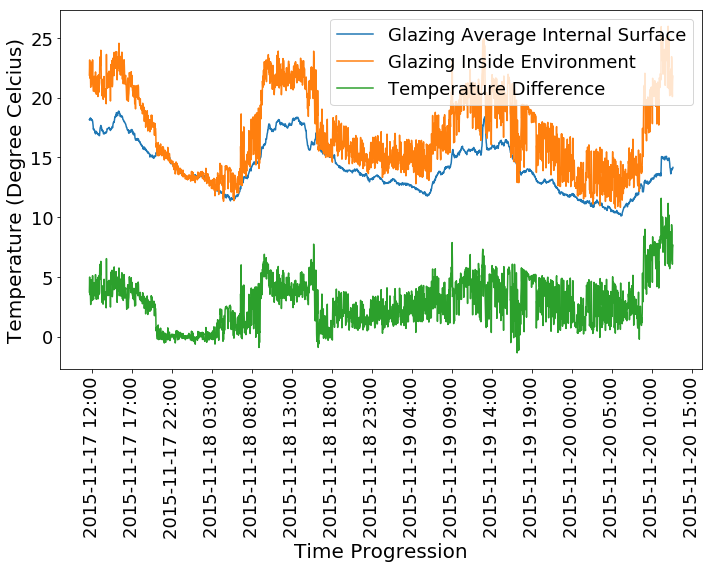

In [118]:
BE_data['Int_Glaze_Surface_Air_Diff'] = np.subtract(BE_data['TT_6 (degC)'], BE_data['In_Glaze_Surface_Avg'])

ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE, BE_data['In_Glaze_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['TT_6 (degC)'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Int_Glaze_Surface_Air_Diff'], fmt='-', xdate=True)
plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.legend(['Glazing Average Internal Surface', 'Glazing Inside Environment', 'Temperature Difference'],fontsize=18)
plt.tight_layout()
plt.savefig('glaze_internal_surface.png')


## Glazing: External Surface 

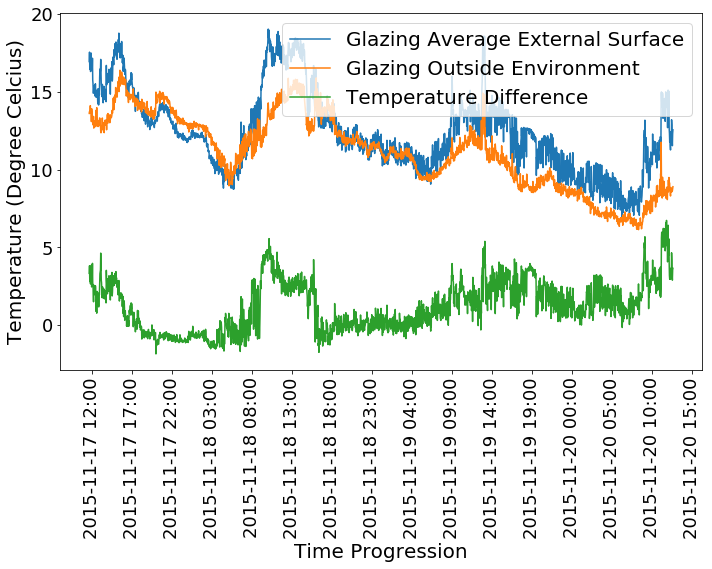

In [119]:
BE_data['Ext_Glaze_Surface_Air_Diff'] = np.subtract(BE_data['Ext_Glaze_Surface_Avg'], BE_data['TT_7 (degC)'])

ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE, BE_data['Ext_Glaze_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['TT_7 (degC)'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Ext_Glaze_Surface_Air_Diff'], fmt='-', xdate=True)
plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.legend(['Glazing Average External Surface', 'Glazing Outside Environment', 'Temperature Difference'],fontsize=20)
plt.tight_layout()
plt.savefig('glaze_external_surface.png')


## Opaque Wall: Internal Surface vs. Air

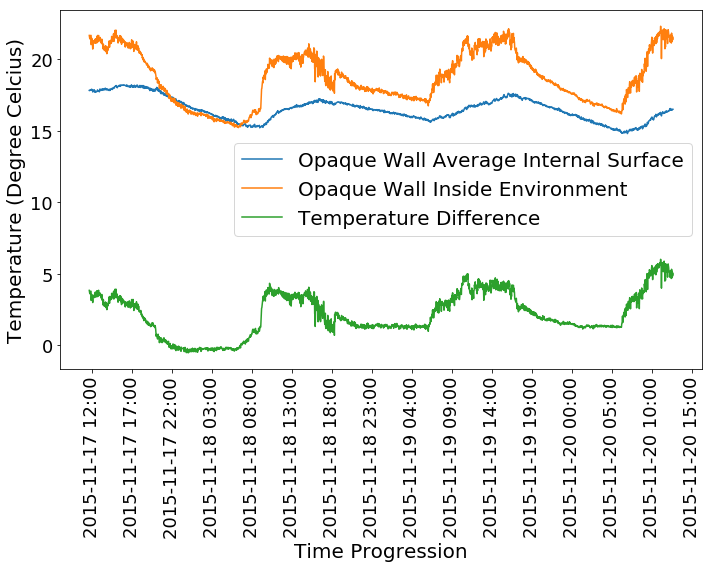

In [120]:
BE_data['Int_Wall_Surface_Air_Diff'] = np.subtract(BE_data['TT_2 (degC)'], BE_data['In_Wall_Surface_Avg'])

ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE, BE_data['In_Wall_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['TT_2 (degC)'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Int_Wall_Surface_Air_Diff'], fmt='-', xdate=True)
plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.legend(['Opaque Wall Average Internal Surface', 'Opaque Wall Inside Environment', 'Temperature Difference'],fontsize=20)
plt.tight_layout()
plt.savefig('Wall_internal_surface.png')


## Opaque Wall: External Surface vs. Air

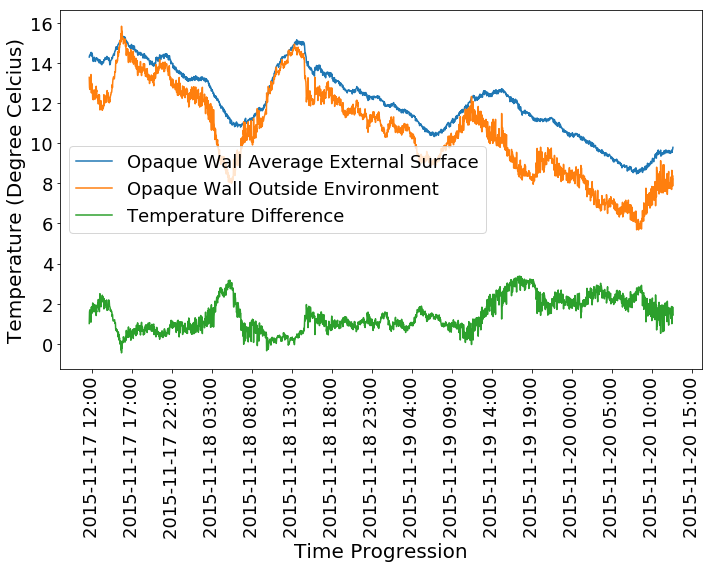

In [121]:
BE_data['Ext_Wall_Surface_Air_Diff'] = np.subtract(BE_data['Ext_Wall_Surface_Avg'], BE_data['TT_12 (degC)'])

ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE, BE_data['Ext_Wall_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['TT_12 (degC)'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Ext_Wall_Surface_Air_Diff'], fmt='-', xdate=True)
plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.legend(['Opaque Wall Average External Surface', 'Opaque Wall Outside Environment', 'Temperature Difference'],fontsize=18)
plt.tight_layout()
plt.savefig('Wall_external_surface.png')


## Internal Surfaces: Glazing vs. Opaque Wall

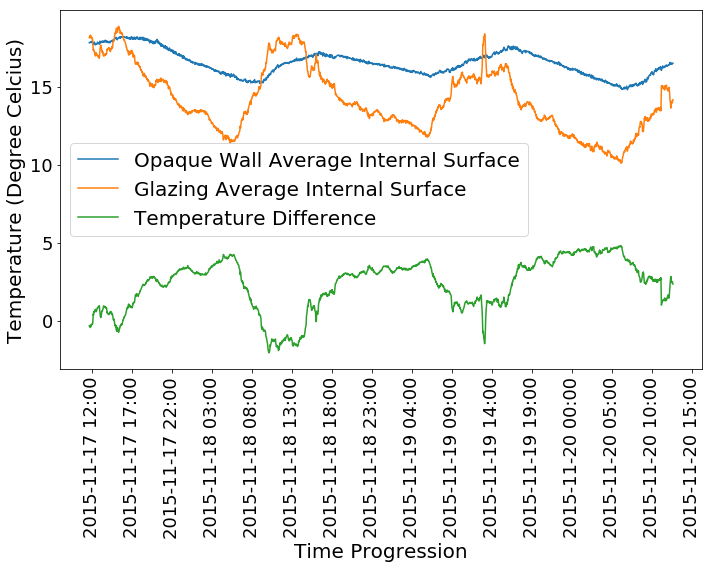

In [122]:
BE_data['Int_Wall_Glaze_Surf_Diff'] = np.subtract(BE_data['In_Wall_Surface_Avg'], BE_data['In_Glaze_Surface_Avg'])

ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE, BE_data['In_Wall_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['In_Glaze_Surface_Avg'], fmt='-', xdate=True)

ax1.plot_date(date_BE, BE_data['Int_Wall_Glaze_Surf_Diff'], fmt='-', xdate=True)
plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.legend(['Opaque Wall Average Internal Surface', 'Glazing Average Internal Surface', 'Temperature Difference'],fontsize=20)
plt.tight_layout()
plt.savefig('Int_wall_glaze_surface.png')


## Internal Air: Glazing vs. Opaque Wall

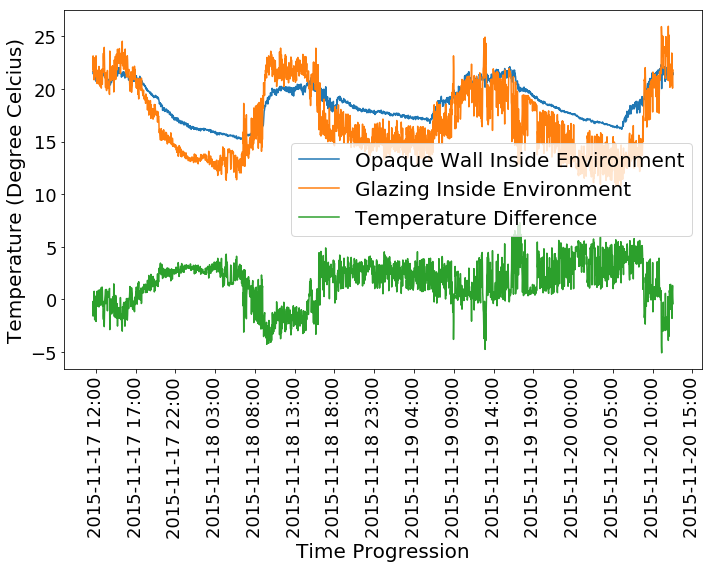

In [123]:
BE_data['Int_Wall_Glaze_Air_Diff'] = np.subtract(BE_data['TT_2 (degC)'], BE_data['TT_6 (degC)'])

ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE, BE_data['TT_2 (degC)'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['TT_6 (degC)'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Int_Wall_Glaze_Air_Diff'], fmt='-', xdate=True)
plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.legend(['Opaque Wall Inside Environment', 'Glazing Inside Environment', 'Temperature Difference'],fontsize=20)
plt.tight_layout()
plt.savefig('Int_wall_glaze_air.png')


## External Surfaces: Glazing vs. Opaque Wall

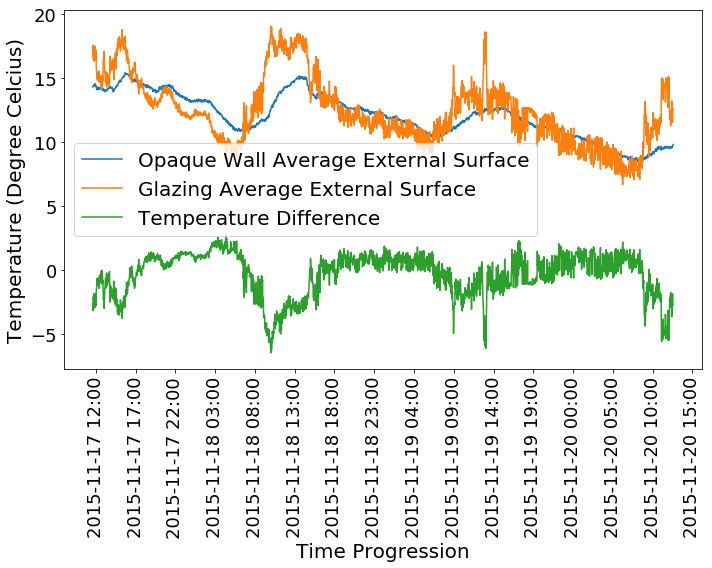

In [124]:
BE_data['Ext_Wall_Glaze_Surf_Diff'] = np.subtract(BE_data['Ext_Wall_Surface_Avg'], BE_data['Ext_Glaze_Surface_Avg'])

ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE, BE_data['Ext_Wall_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Ext_Glaze_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Ext_Wall_Glaze_Surf_Diff'], fmt='-', xdate=True)
plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.legend(['Opaque Wall Average External Surface', 'Glazing Average External Surface', 'Temperature Difference'],fontsize=20)
plt.tight_layout()
plt.savefig('Ext_wall_glaze_surf.png')

## Glazing U Value: Heat flow vs. Temperature difference 

In [125]:
BE_data['Glaze_Int_Ext_Surf_Diff'] = np.subtract(BE_data['In_Glaze_Surface_Avg'], BE_data['Ext_Glaze_Surface_Avg'])
BE_data['Glaze_U_with_Rad'] = np.divide(BE_data['HFM1 (W/m2)'], np.absolute(BE_data['Glaze_Int_Ext_Surf_Diff']))
BE_data['Glaze_U_wo_Rad'] = np.divide(BE_data['HFM1 (W/m2)']-BE_data['PYR2 (W/m2)'], np.absolute(BE_data['Glaze_Int_Ext_Surf_Diff']))

BE_data['Wall_Int_Ext_Surf_Diff'] = np.subtract(BE_data['In_Wall_Surface_Avg'], BE_data['Ext_Wall_Surface_Avg'])

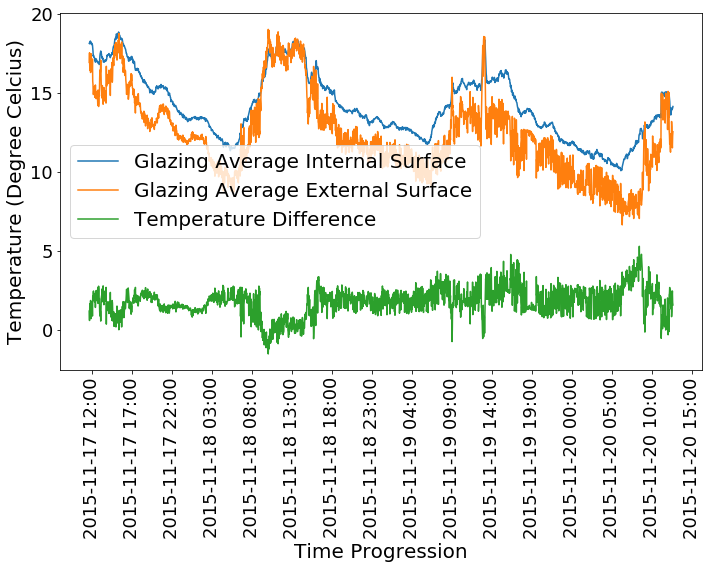

In [126]:
ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE, BE_data['In_Glaze_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Ext_Glaze_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Glaze_Int_Ext_Surf_Diff'], fmt='-', xdate=True)
plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.legend(['Glazing Average Internal Surface', 'Glazing Average External Surface', 'Temperature Difference'],fontsize=20)
plt.tight_layout()
plt.savefig('Glaze_Int_Ext_Surf_Diff.png')

C:\Users\weijia\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


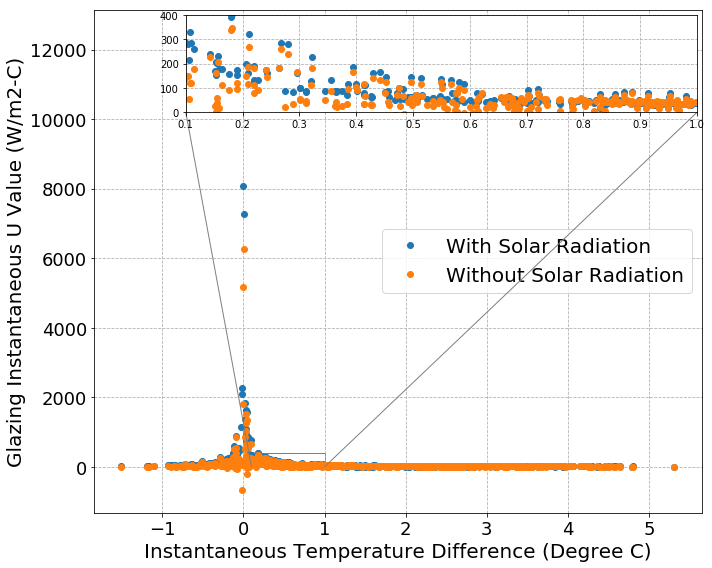

In [164]:
# ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
# ax1.plot(BE_data['Glaze_Int_Ext_Surf_Diff'], BE_data['Glaze_U_with_Rad'],'o')
# ax1.plot(BE_data['Glaze_Int_Ext_Surf_Diff'], BE_data['Glaze_U_wo_Rad'],'o')
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(BE_data['Glaze_Int_Ext_Surf_Diff'], BE_data['Glaze_U_with_Rad'], 'o')
ax.plot(BE_data['Glaze_Int_Ext_Surf_Diff'], BE_data['Glaze_U_wo_Rad'], 'o')
plt.legend(['With Solar Radiation', 'Without Solar Radiation'],loc=7,fontsize=20)
ax.grid(ls='dashed')

plt.xlabel('Instantaneous Temperature Difference (Degree C)',fontsize=20)
plt.ylabel('Glazing Instantaneous U Value (W/m2-C)',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 7, loc=1)
axins.plot(BE_data['Glaze_Int_Ext_Surf_Diff'], BE_data['Glaze_U_with_Rad'], 'o')
axins.plot(BE_data['Glaze_Int_Ext_Surf_Diff'], BE_data['Glaze_U_wo_Rad'], 'o')

x1,x2,y1,y2 = 0.1,1,0,400
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
axins.grid(ls='dashed')

plt.tight_layout()
plt.savefig('Glaze_U_w_Outlier.png')

In [128]:
BE_data[['Glaze_U_with_Rad','Glaze_U_wo_Rad']].describe()

,Glaze_U_with_Rad,Glaze_U_wo_Rad
count,2189.000000,2189.000000
mean,53.098177,35.223713
std,373.741569,192.025503
min,5.964233,-664.844323
25%,13.549765,13.812151
50%,17.325042,17.430085
75%,27.307959,25.519999
max,12484.804203,6276.761702


# Running Average Glazing U Value

In [129]:
N = BE_data.shape[0]

In [188]:
Glaze_U_Avg_Rad = np.convolve(BE_data['Glaze_U_with_Rad'][BE_data['Glaze_U_with_Rad']<18], np.ones((N,))/N, mode='valid')
Glaze_U_Avg_Rad

array([7.32425329, 7.32425329, 7.32425329, ..., 7.32425329, 7.32425329,
       7.32425329])

In [187]:
Glaze_U_Avg_wo_Rad = np.convolve(BE_data['Glaze_U_wo_Rad'][BE_data['Glaze_U_wo_Rad']<18], np.ones((N,))/N, mode='valid')
Glaze_U_Avg_wo_Rad

array([6.60743544, 6.60743544, 6.60743544, ..., 6.60743544, 6.60743544,
       6.60743544])

# Opaque Wall U Value

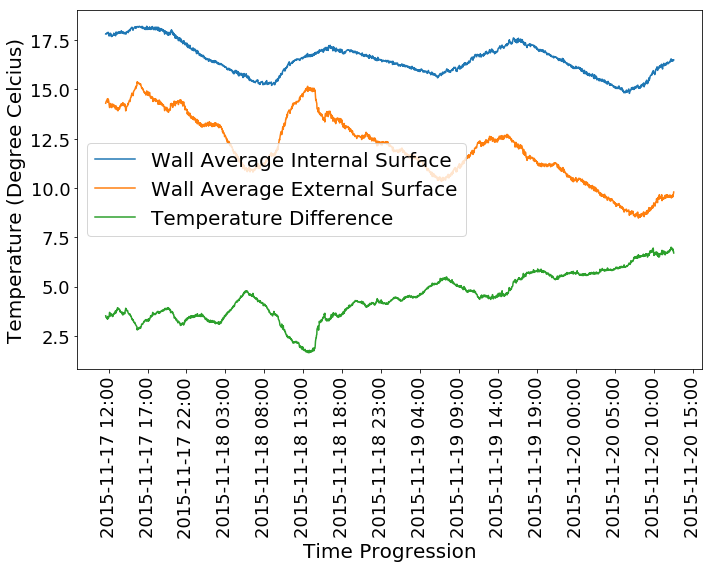

In [132]:
ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE, BE_data['In_Wall_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Ext_Wall_Surface_Avg'], fmt='-', xdate=True)
ax1.plot_date(date_BE, BE_data['Wall_Int_Ext_Surf_Diff'], fmt='-', xdate=True)
plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.legend(['Wall Average Internal Surface', 'Wall Average External Surface', 'Temperature Difference'],fontsize=20)
plt.tight_layout()
plt.savefig('Wall_Int_Ext_Surf_Diff.png')

In [199]:
BE_data['R_Value'] = np.divide(BE_data['HFM2 (W/m2)'], BE_data['In_Wall_Surface_Avg']-BE_data['Ext_Wall_Surface_Avg'])
R_Avg = np.convolve(BE_data['R_Value'][BE_data['R_Value']<2], np.ones((N,))/N, mode='valid')

In [134]:
R_i = 0.13 #Guide A Table 3.8
R_e = 0.04 #Guide A Table 3.9
h_i =  1/R_i 
h_e =  1/R_e

In [200]:
R_Avg

array([0.465184, 0.465184, 0.465184, ..., 0.465184, 0.465184, 0.465184])

In [178]:
BE_data['Wall_U'] = 1/(R_i + BE_data['R_Value'] + R_e) #R=1/h
BE_data['Wall_U'].describe()

count    2189.000000
mean       -0.411562
std        13.002993
min      -282.199093
25%         0.190244
50%         0.355400
75%         0.615083
max       301.704616
Name: Wall_U, dtype: float64

### Wall U Value Moving Average

In [249]:
Wall_U_Avg = np.convolve(BE_data['Wall_U'][np.absolute(BE_data['Wall_U'])<1.2], np.ones((N,))/N, mode='valid')
Wall_U_Avg

array([0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648102,
       0.35648102, 0.35648102, 0.35648102, 0.35648102, 0.35648

## U Values Based on Air Temperature

In [248]:
BE_data['Wall_U_Actual'] = BE_data['HFM2 (W/m2)'] / (BE_data['TT_2 (degC)'] - BE_data['TT_12 (degC)'])
Wall_Actual_U = np.convolve(BE_data['Wall_U_Actual'][BE_data['Wall_U_Actual']<1.2], np.ones((N,))/N, mode='valid')
Wall_Actual_U

array([0.30023574, 0.30023574, 0.30023574, ..., 0.30023574, 0.30023574,
       0.30023574])

In [196]:
BE_data['Wall_U_Actual'].describe()

count    2189.000000
mean        1.310195
std         0.917725
min        -0.647441
25%         0.777837
50%         1.170627
75%         2.012329
max         3.756370
Name: Wall_U_Actual, dtype: float64

In [243]:
BE_data['Glaze_U_Actual'] = BE_data['HFM1 (W/m2)'] / (BE_data['TT_6 (degC)'] - BE_data['TT_7 (degC)'])
Glaze_Actual_U = np.convolve(BE_data['Glaze_U_Actual'][BE_data['Glaze_U_Actual']<18], np.ones((N,))/N, mode='valid')
Glaze_Actual_U

array([5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297914,
       5.79297914, 5.79297914, 5.79297914, 5.79297914, 5.79297

C:\Users\weijia\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


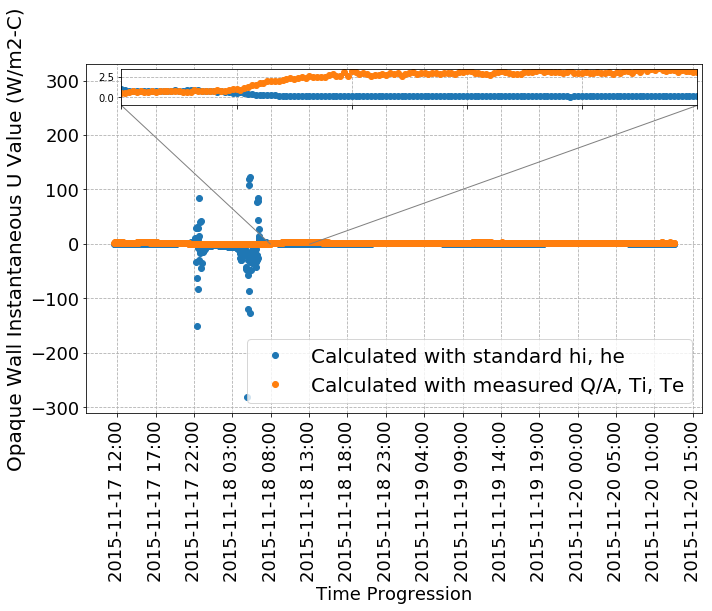

In [150]:
fig, ax = plt.subplots(figsize=(10,8))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.plot_date(date_BE, BE_data['Wall_U'], 'o')
ax.plot_date(date_BE, BE_data['Wall_U_Actual'],'o')
plt.legend(['Calculated with standard hi, he', 'Calculated with measured Q/A, Ti, Te'], fontsize=20, loc=4)
ax.grid(ls='dashed')

plt.xticks(rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=18)
plt.ylabel('Opaque Wall Instantaneous U Value (W/m2-C)',fontsize=20)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 15, loc=1)
axins.plot_date(date_BE, BE_data['Wall_U'], 'o')
axins.plot_date(date_BE, BE_data['Wall_U_Actual'],'o')

x1,x2,y1,y2 = dt.datetime(2015, 11, 18, 8, 0),dt.datetime(2015, 11, 18, 13, 0),-1,3.5
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)
plt.xticks(visible=False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
axins.grid(ls='dashed')

plt.tight_layout()
plt.savefig('Wall_U_Instan.png')

# Solar Transmittance

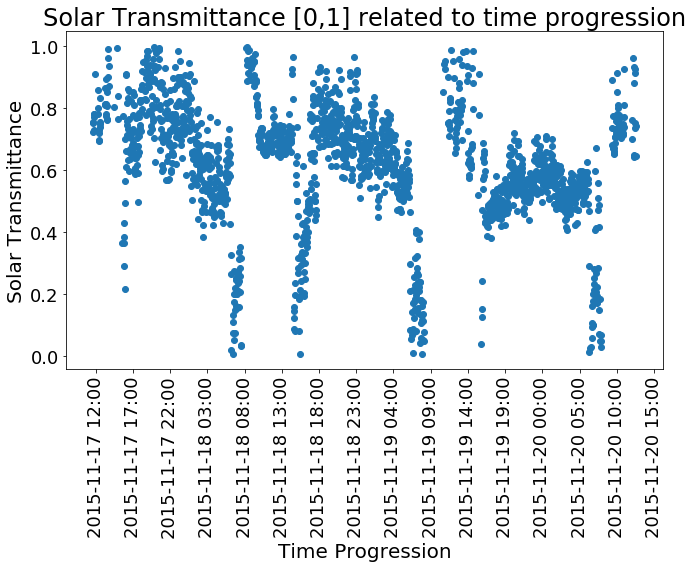

In [223]:
BE_data['T_sol'] = BE_data['PYR2 (W/m2)']/BE_data['PYR1 (W/m2)']
date_BE_Sol = pd.Series(date_BE)[(BE_data['T_sol']<=1) & (BE_data['T_sol']>=0)]

ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.plot_date(date_BE_Sol, BE_data['T_sol'][(BE_data['T_sol']<1) & (BE_data['T_sol']>0)], 'o')

plt.xticks(rotation='vertical', fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.ylabel('Solar Transmittance',fontsize=20)
plt.title('Solar Transmittance [0,1] related to time progression', fontsize=24)
plt.tight_layout()
plt.savefig('T_sol.png')

In [155]:
T_sol_clean = BE_data['T_sol'][(BE_data['T_sol']<1) & (BE_data['T_sol']>0)]
T_sol_clean_Array = np.array(T_sol_clean)
N_clean = T_sol_clean_Array.size
T_sol_clean_Avg = np.convolve(T_sol_clean_Array, np.ones((N_clean,))/N_clean, mode='valid')
T_sol_clean_Avg

array([0.61784783])

## Glaze G Value

In [171]:
BE_data['Glaze_R'] = 1/BE_data['Glaze_U_Actual'] - 1/h_i - 1/h_e
n =  BE_data['Glaze_U_Actual']*(1/h_e + 0.5*BE_data['Glaze_R'] )
n;

In [174]:
BE_data['Glaze_G'] = BE_data['T_sol'] + n * 0.05
Glaze_G_Avg = np.convolve(BE_data['Glaze_G'], np.ones((N,))/N, mode='valid')
Glaze_G_Avg

array([0.81650556])

In [158]:
updated_G = (T_sol_clean_Avg + 0.30515)/1.30415
updated_G

array([0.70773901])

## Descriptions


In [232]:
BE_data['Timestamp'][BE_data['Wall_Int_Ext_Surf_Diff']==BE_data['Wall_Int_Ext_Surf_Diff'].max()]

2178    2015-11-20 12:14
Name: Timestamp, dtype: object

In [233]:
BE_data['Wall_Int_Ext_Surf_Diff'].max()

6.995508000000001